Sky Kapoor and Chrus Compierchio

This program will edit a wav file using the fast Fourier transform

In [1]:
#import libraries
from scipy.io.wavfile import read, write
from numpy import empty
import matplotlib.pyplot as plt
import numpy as np

PART B

In [29]:
#Read in sound data and split into channels
sample, data = read('GraviteaTime.wav')
channel_0 = data[:, 0]
channel_1 = data[:, 1]

In [30]:
#Find the time domain for the input data
duration0 = len(channel_0)/sample
times0 = np.arange(0,duration0,1/sample)

duration1 = len(channel_1)/sample
times1 = np.arange(0,duration0,1/sample)

Text(0, 0.5, 'Channel 1 Amplitude')

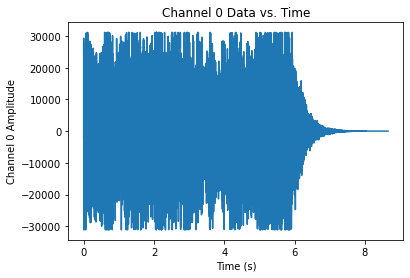

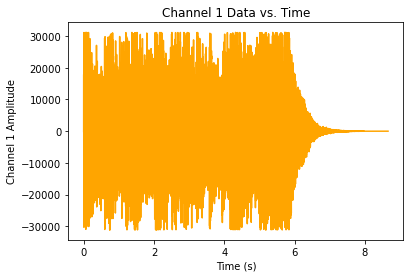

In [31]:
#Plot both sets of data on the time domain
plt.figure()
plt.plot(times0, channel_0)
plt.title("Channel 0 Data vs. Time")
plt.ylabel("Channel 0 Amplitude")
plt.xlabel("Time (s)")

plt.figure()
plt.plot(times1, channel_1, color = 'orange')
plt.title("Channel 1 Data vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Channel 1 Amplitude")

PART C

(0.2, 0.5)

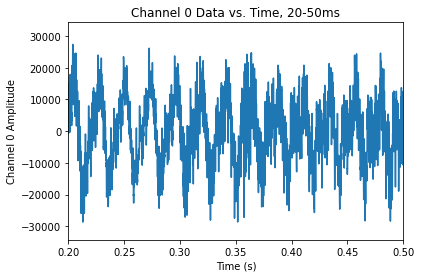

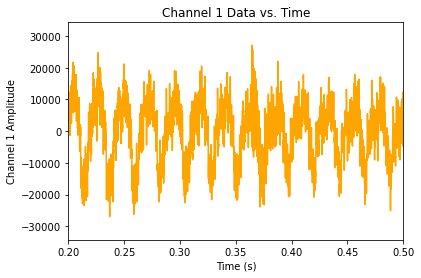

In [33]:
#Plot the time series for 20-0.50ms
plt.figure()
plt.plot(times0, channel_0)
plt.title("Channel 0 Data vs. Time, 20-50ms")
plt.ylabel("Channel 0 Amplitude")
plt.xlabel("Time (s)")
plt.xlim(0.2, 0.5)

plt.figure()
plt.plot(times1, channel_1, color = 'orange')
plt.title("Channel 1 Data vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Channel 1 Amplitude")
plt.xlim(0.2, 0.5)

PART D

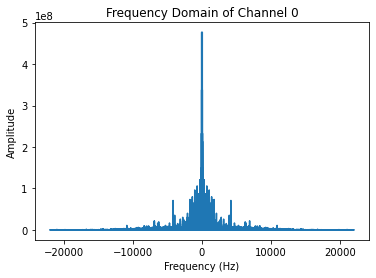

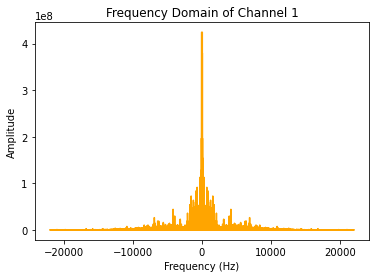

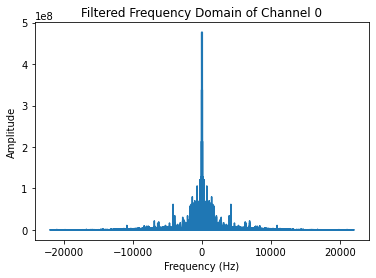

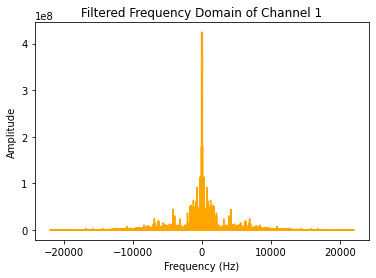

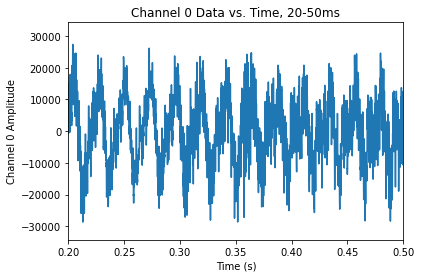

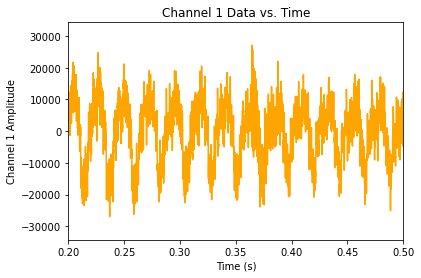

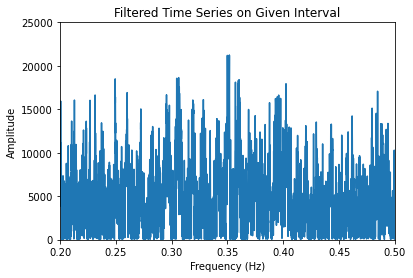

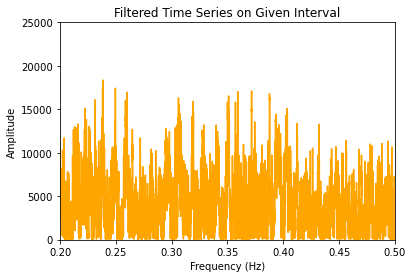

In [67]:
#Fourier Transform each channel
fft0 = np.fft.fft(channel_0)
fft1 = np.fft.fft(channel_1)

#Find the frequencie domains for each channel
freq0 = np.fft.fftfreq(len(channel_0), times0[1]-times0[0])
freq1 = np.fft.fftfreq(len(channel_1), times1[1]-times1[0])

#Plot the amplitude of the non-filtered data for each channel
plt.plot(freq0, np.abs(fft0))
plt.title("Frequency Domain of Channel 0")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()

plt.plot(freq1, np.abs(fft1), color = "orange")
plt.title("Frequency Domain of Channel 1")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()

#Set any frequency higher than 800Hz to 0Hz in each channel
for i in range(fft0.size):
    if fft0[i] > 880:
        fft0[i] = 0
for j in range(fft1.size):
    if fft1[j] > 880:
        fft1[j] = 0

#Plot the filtered frequency domain of each channel
plt.plot(freq0, np.abs(fft0))
plt.title("Filtered Frequency Domain of Channel 0")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()

plt.plot(freq1, np.abs(fft1), color = "orange")
plt.title("Filtered Frequency Domain of Channel 1")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()

#Convert each channel back to the time domain
data0 = np.fft.ifft(fft0)  
data1 = np.fft.ifft(fft1)

#Plot the original time domains
plt.plot(times0, channel_0)
plt.title("Channel 0 Data vs. Time, 20-50ms")
plt.ylabel("Channel 0 Amplitude")
plt.xlabel("Time (s)")
plt.xlim(0.2, 0.5)
plt.show()

plt.plot(times1, channel_1, color = 'orange')
plt.title("Channel 1 Data vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Channel 1 Amplitude")
plt.xlim(0.2, 0.5)
plt.show()

#Plot the filtered time domains
plt.plot(times0, np.abs(data0))
plt.title("Filtered Time Series on Given Interval")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0.2, 0.5)
plt.ylim(-25,25000)
plt.show()

plt.plot(times1, np.abs(data1), color = "orange")
plt.title("Filtered Time Series on Given Interval")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.xlim(0.2, 0.5)
plt.ylim(-25,25000)
plt.show()
        

In [69]:
#Save the filtered data as a new .wav file
data_out = empty(data.shape, dtype = data.dtype)
data_out[:, 0] = data0
data_out[:, 1] = data1
write('GraviteaTime_lpf.wav', sample, data_out)

<ipython-input-69-61a937f97c96>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  data_out[:, 0] = data0
<ipython-input-69-61a937f97c96>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  data_out[:, 1] = data1
